In [2]:
import numpy as np
import matplotlib.pyplot as plt

###################################################################################
##### Thermal bremsstrahlung simulation manually coverted from Raf's IDL code #####
###################################################################################

n = 20 # Ok for extended progenitors
beta = 1 # Assumes equilibrium
Gamma = 2
simrange = 10000
timevect = np.zeros((simrange),float)
Lffvect1 = np.zeros((simrange),float)
Lffvect2 = np.zeros((simrange),float)
Lffvect3 = np.zeros((simrange),float)
Lffvect4 = np.zeros((simrange),float)

def bremss(i,Astar):
    # From Chevalier and Fransson 2006, where assuming v_w=100 km/s, so that now Astar=1 is for 10^-5 and v_w=100
    # Factor of 0.5 in front is because only half will be radiated in our direction
    return 0.5*3.*10**(35)*(n-3)*(n-4.)**2/(4.*(n-2.))*beta**0.5*1/Gamma*(Astar)**2*(timevect[i]/10)**(-1.)

for i in range(0,timevect.size):
    timevect[i] = i
    Lffvect1[i] = bremss(i,(100.*10)) # This is Mdot=E-3 Msun/yr for v_w=100 km/s
    Lffvect2[i] = bremss(i,(1000.*10)) # This is Mdot=E-2 Msun/yr for v_w=100 km/s
    Lffvect3[i] = bremss(i,(10000.*10)) # This is Mdot=E-1 Msun/yr for v_w=100 km/s
    Lffvect4[i] = bremss(i,(100000.*10)) # This is Mdot=1 Msun/yr for v_w=100 km/s
    
bandfactor = 0.52 # T=20 keV, the 0.3-10 keV flux is 52% of the total -- UNABSORBED (calculated with Xspec)
absE21 = 5.1/5.8 # Diminished XMM flux due to E+21 cm^-2 absorption (calculated with Xspec)
absE22 = 4.09/5.8 # Diminished XMM flux due to E+22 cm^-2 absorption (calculated with Xspec)
absE23 = 2.32/5.8 # Diminished XMM flux due to E+23 cm^-2 absorption (calculated with Xspec)
absE24 = 0.37/5.8 # Diminished XMM flux due to E+24 cm^-2 absorption (calculated with Xspec)

# Scaling function
def scale(inpvect,absE):
    return (inpvect*bandfactor*absE)

# Scale Mdot = E-3 Msun/yr for zero, E+21, E+22, E+23, and E+24 intrinsic absorption
f1_none = scale(Lffvect1,1)
f1_E21 = scale(Lffvect1,absE21)
f1_E22 = scale(Lffvect1,absE22)
f1_E23 = scale(Lffvect1,absE23) 
f1_E24 = scale(Lffvect1,absE24) 

# Scale Mdot = E-2 Msun/yr for zero, E+21, E+22, E+23, and E+24 intrinsic absorption
f2_none = scale(Lffvect2,1)
f2_E21 = scale(Lffvect2,absE21)
f2_E22 = scale(Lffvect2,absE22)
f2_E23 = scale(Lffvect2,absE23)
f2_E24 = scale(Lffvect2,absE24)

# Scale Mdot = E-1 Msun/yr for zero, E+21, E+22, E+23, and E+24 intrinsic absorption
f3_none = scale(Lffvect3,1)
f3_E21 = scale(Lffvect3,absE21)
f3_E22 = scale(Lffvect3,absE22)
f3_E23 = scale(Lffvect3,absE23)
f3_E24 = scale(Lffvect3,absE24)


<ipython-input-2-ccd9303d3232>:21: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5*3.*10**(35)*(n-3)*(n-4.)**2/(4.*(n-2.))*beta**0.5*1/Gamma*(Astar)**2*(timevect[i]/10)**(-1.)


In [3]:
####################
##### SNe Data #####
####################

# PS1-MDS Data
ps1_limits = np.loadtxt('PS1_limits_t.txt',delimiter="\t",skiprows=1)
ps11aop = np.loadtxt('PS11aop.txt',delimiter="\t")

# Comparison Type IIn SNe
compdata = np.loadtxt('IIncomparison.txt',delimiter="\t",skiprows=1)
ps11aop[0]

1314.87192

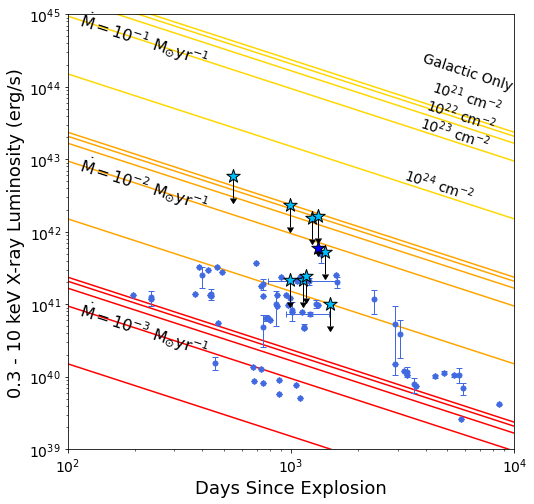

In [7]:
####################
##### Plotting #####
####################

# General parameters
title = ""
title_fontsize = 20
fig_size = (8,8)

# Axis parameters 
axis_fontsize = 18
x_axlabel = "Days Since Explosion"
y_axlabel = "0.3 - 10 keV X-ray Luminosity (erg/s)"
x_range = [100,10000]
#y_range = [0.5E+41,E+43]
y_range = [1E+39,1E+45]

# Marker parameters
ps1_msize = 200
ps1_marker = "*"
ps1_linewidth = 1
ps1_capsize = 3
ps1_color = "deepskyblue"
comp_msize = 100
comp_marker = "."
comp_linewidth = 1
comp_capsize = 3
comp_color = "royalblue"
f1_color = "red"
f2_color = "orange"
f3_color = "gold"

# Initialize plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Plot PS1-MDS data
ps1 = plt.scatter(ps1_limits[:,0],ps1_limits[:,1],zorder=10,linestyle='None',marker=ps1_marker,c=ps1_color,s=ps1_msize,edgecolors='black')
ps1er = plt.errorbar(ps1_limits[:,0],ps1_limits[:,1],yerr=0.5*ps1_limits[:,1],zorder=9,uplims=True,elinewidth=ps1_linewidth,ecolor='black',capsize=ps1_capsize,linestyle='None',marker="")
aop = plt.scatter(ps11aop[0],ps11aop[1],zorder=10,linestyle='None',marker=ps1_marker,c='blue',s=ps1_msize,edgecolors='black')
aop_err = plt.errorbar(ps11aop[0],ps11aop[1],yerr=ps11aop[2],zorder=9,uplims=True,elinewidth=ps1_linewidth,ecolor='black',capsize=ps1_capsize,linestyle='None',marker="")


# Plot IIn comparison data
plotcomp = plt.scatter(compdata[:,0],compdata[:,2],zorder=8,linestyle='None',marker=comp_marker,c=comp_color,s=100)
plotcomper = plt.errorbar(compdata[:,0],compdata[:,2],xerr=compdata[:,1],yerr=compdata[:,3],zorder=7,elinewidth=comp_linewidth,ecolor=comp_color,capsize=comp_capsize,linestyle='None',marker="")

# Plot mdot simulation lines
plt.plot(timevect,f1_none, color=f1_color);
plt.plot(timevect,f1_E21, color=f1_color);
plt.plot(timevect,f1_E22, color=f1_color);
plt.plot(timevect,f1_E23, color=f1_color);
plt.plot(timevect,f1_E24, color=f1_color);
plt.plot(timevect,f2_none, color=f2_color);
plt.plot(timevect,f2_E21, color=f2_color);
plt.plot(timevect,f2_E22, color=f2_color);
plt.plot(timevect,f2_E23, color=f2_color);
plt.plot(timevect,f2_E24, color=f2_color);
plt.plot(timevect,f3_none, color=f3_color);
plt.plot(timevect,f3_E21, color=f3_color);
plt.plot(timevect,f3_E22, color=f3_color);
plt.plot(timevect,f3_E23, color=f3_color);
plt.plot(timevect,f3_E24, color=f3_color);

# Apply axis parameters
plt.xlabel(x_axlabel, fontsize=axis_fontsize);
plt.ylabel(y_axlabel, fontsize=axis_fontsize);
plt.title(title, fontsize=title_fontsize);
plt.xlim(x_range);
plt.ylim(y_range);
plt.yscale('log');
plt.xscale('log');
ax.tick_params(axis='both', which='major', labelsize=14)
plt.legend((ps1,aop,plotcomp),(r'PS1-MDS $3\sigma$ limits',r'PS11aop (3.9$\sigma$)',"Known SNe IIn"));
plt.legend((ps1,plotcomp),(r'PS1-MDS $3\sigma$ limits',"Known SNe IIn"));

# Additional text
textangle = -18
addtextsize1 = 16
addtextsize2 = 14
plt.text(110, 2E+40, r'$\rm\dot{M}=10^{-3}$ $\rmM_{\odot}yr^{-1}$',rotation=textangle,fontsize=addtextsize1)
plt.text(110, 2E+42, r'$\rm\dot{M}=10^{-2}$ $\rmM_{\odot}yr^{-1}$',rotation=textangle,fontsize=addtextsize1)
plt.text(110, 2E+44, r'$\rm\dot{M}=10^{-1}$ $\rmM_{\odot}yr^{-1}$',rotation=textangle,fontsize=addtextsize1)
plt.text(3150, 2.6E+42, r'$10^{24}$ cm$^{-2}$',rotation=textangle,fontsize=addtextsize2)
plt.text(3700, 1.35E+43, r'$10^{23}$ cm$^{-2}$',rotation=textangle,fontsize=addtextsize2)
plt.text(3950, 2.4E+43, r'$10^{22}$ cm$^{-2}$',rotation=textangle,fontsize=addtextsize2)
plt.text(4200, 4.3E+43, r'$10^{21}$ cm$^{-2}$',rotation=textangle,fontsize=addtextsize2)
plt.text(3800, 9E+43, 'Galactic Only',rotation=textangle,fontsize=addtextsize2);

fig.savefig("PS1-MDS_FinalPlot.pdf");
